<a href="https://colab.research.google.com/github/Lousiboupi/Machine-learning-project/blob/main/Evolve_Equinor_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# import du dataset excel et affichage des colonnes
data = pd.read_excel('Volve production data.xlsx')
print(data.columns)


Index(['DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')


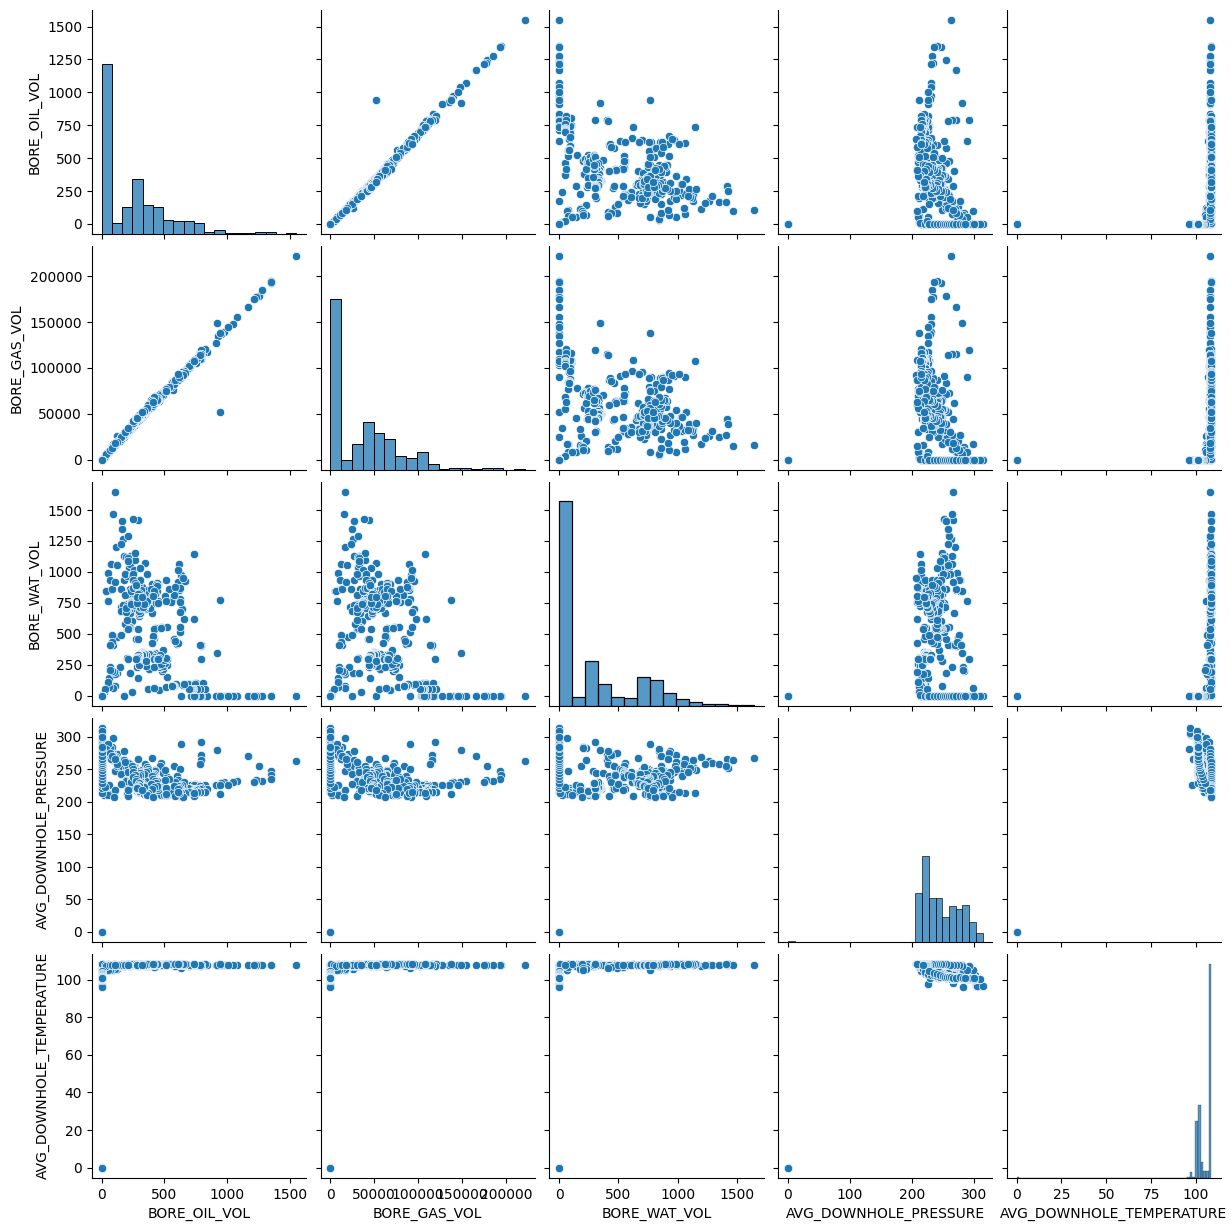

In [12]:
# paiplot for key data
cols = ["BORE_OIL_VOL", "BORE_GAS_VOL", "BORE_WAT_VOL", "AVG_DOWNHOLE_PRESSURE", "AVG_DOWNHOLE_TEMPERATURE"]
sns.pairplot(data[cols].dropna())
plt.show()

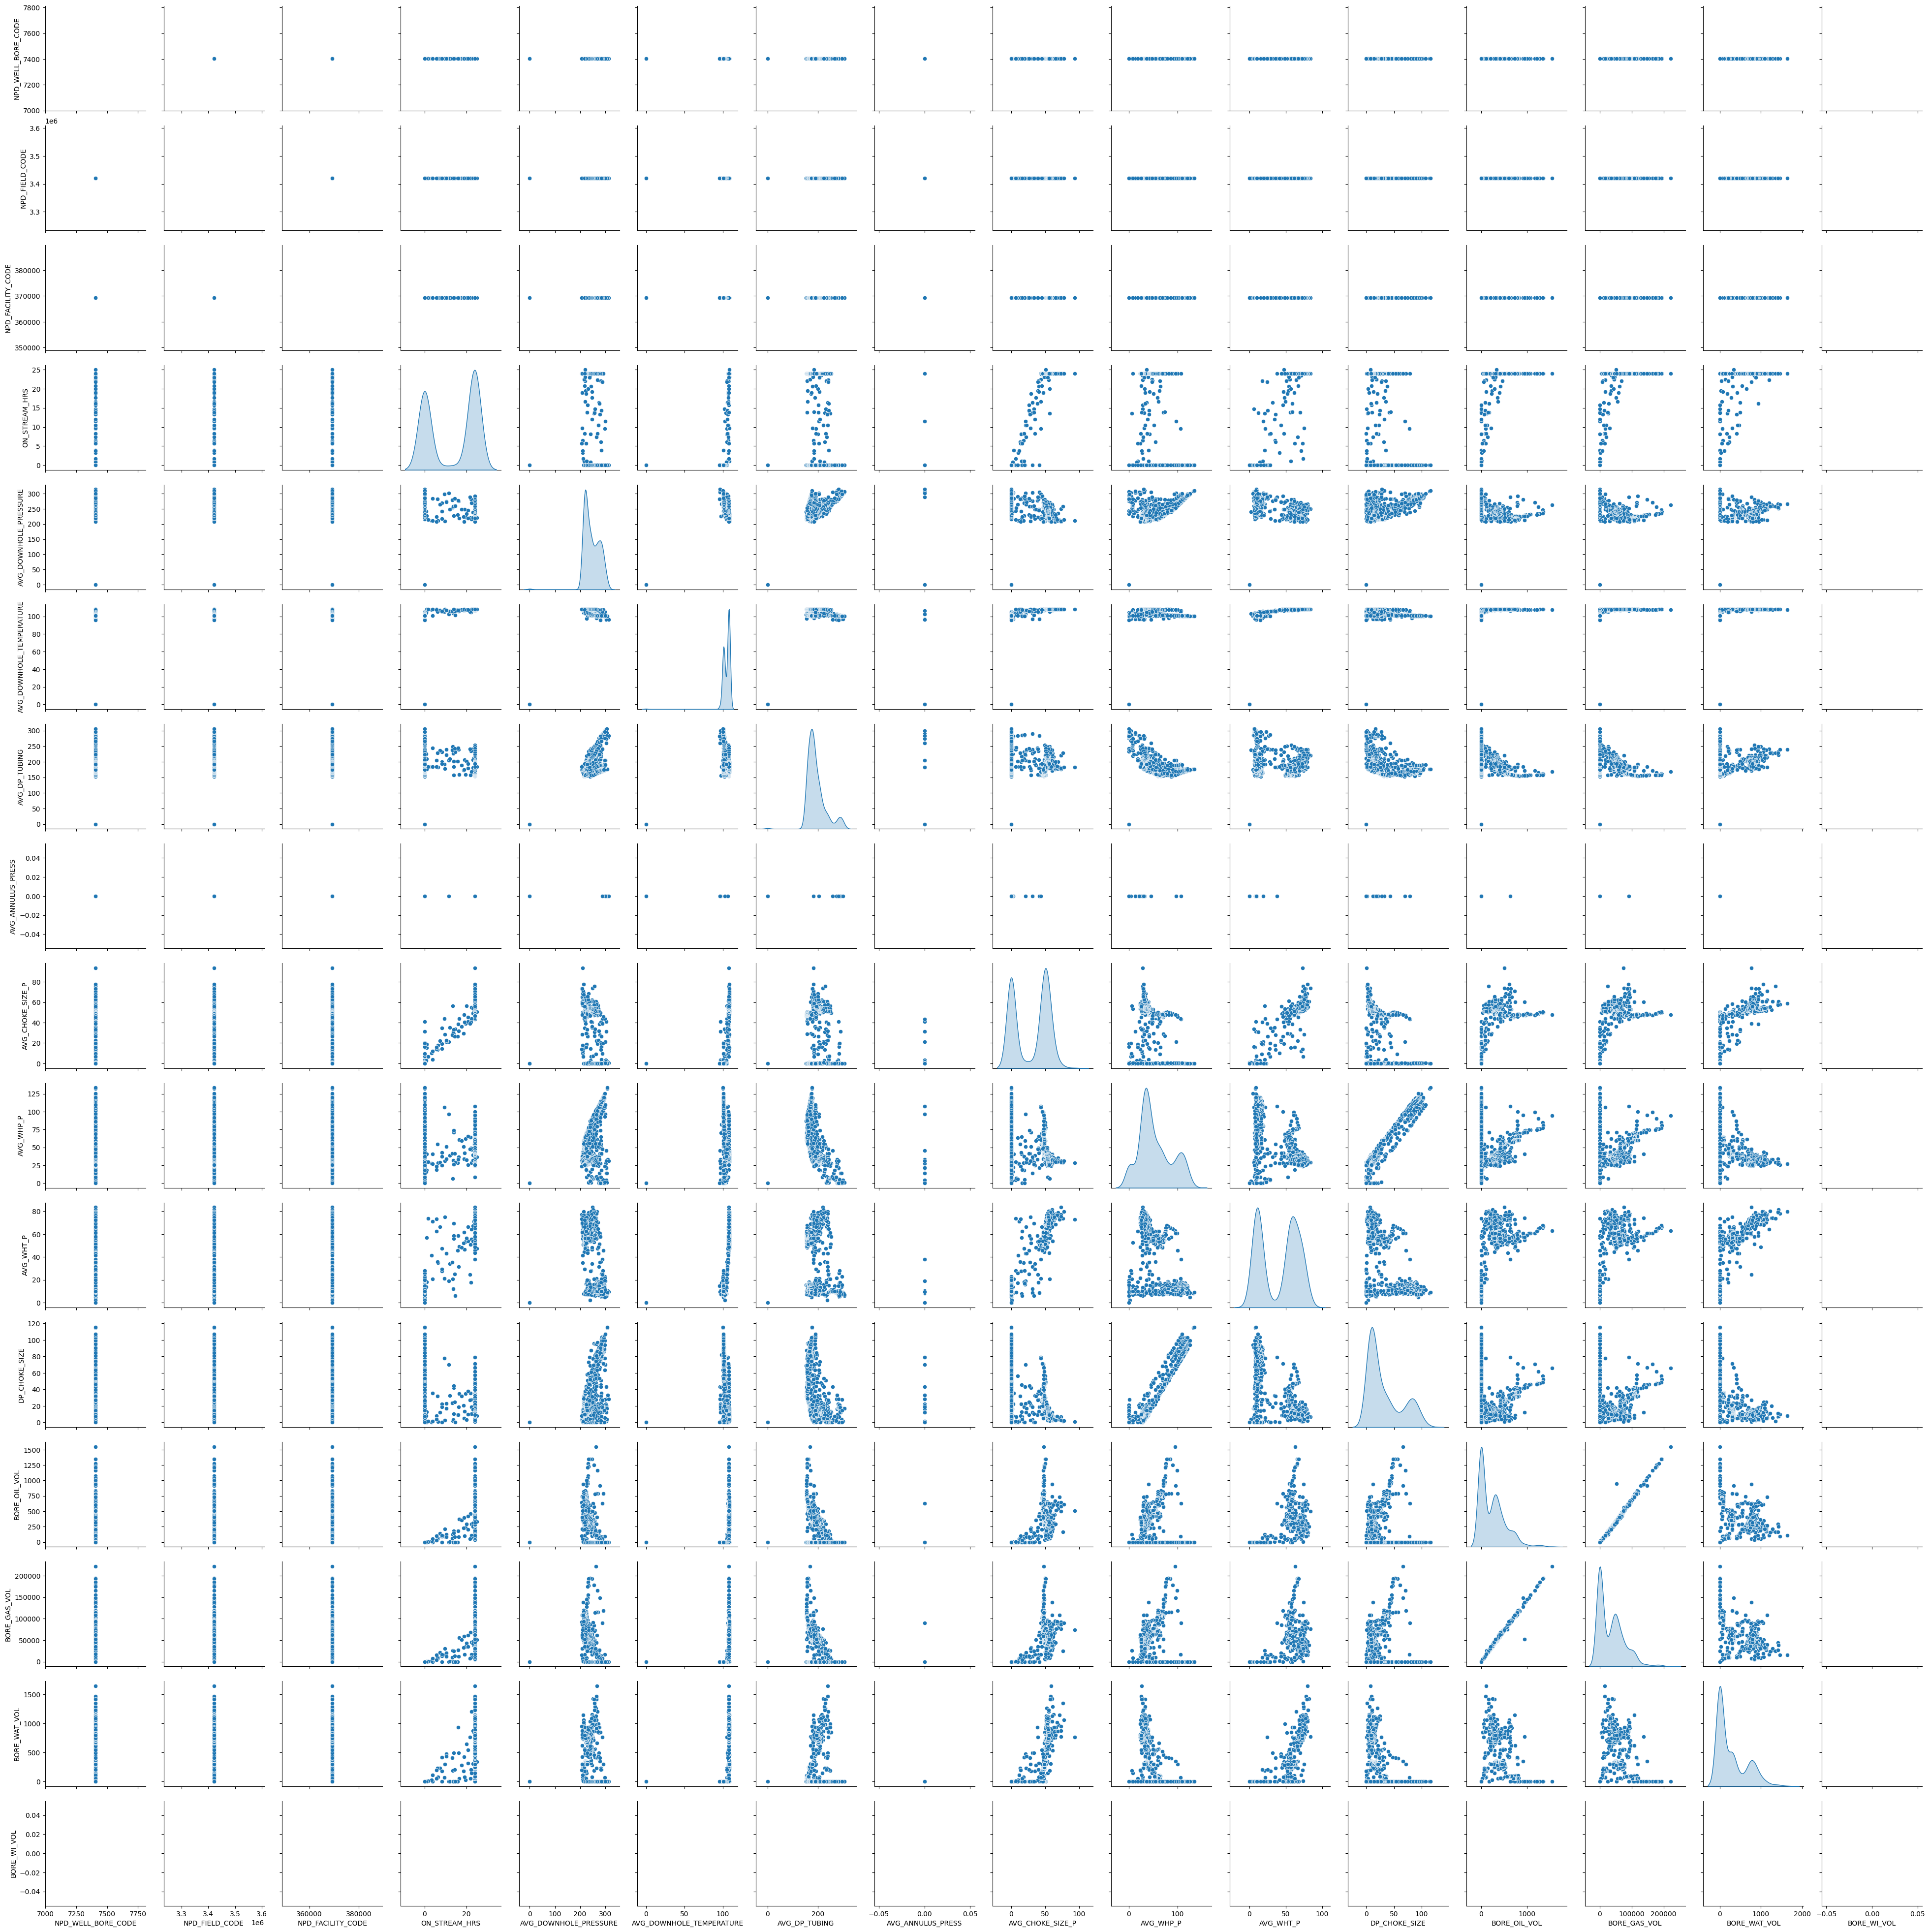

In [16]:
#pairplot for all data

# Sélection uniquement des colonnes numériques
data_num = data.select_dtypes(include="number")

sns.pairplot(data_num, diag_kind="kde")
plt.show()

Statistiques globales :
                          count          mean           std        min  \
NPD_WELL_BORE_CODE        746.0  7.405000e+03      0.000000     7405.0   
NPD_FIELD_CODE            746.0  3.420717e+06      0.000000  3420717.0   
NPD_FACILITY_CODE         746.0  3.693040e+05      0.000000   369304.0   
ON_STREAM_HRS             746.0  1.338275e+01     11.661552        0.0   
AVG_DOWNHOLE_PRESSURE     743.0  2.466660e+02     30.753347        0.0   
AVG_DOWNHOLE_TEMPERATURE  743.0  1.049253e+02      6.448723        0.0   
AVG_DP_TUBING             743.0  1.925402e+02     36.106020        0.0   
AVG_ANNULUS_PRESS          17.0  0.000000e+00      0.000000        0.0   
AVG_CHOKE_SIZE_P          746.0  2.959845e+01     25.483084        0.0   
AVG_WHP_P                 746.0  5.390813e+01     32.967224        0.0   
AVG_WHT_P                 746.0  4.040905e+01     26.115978        0.0   
DP_CHOKE_SIZE             746.0  3.264766e+01     30.426366        0.0   
BORE_OIL_VOL  

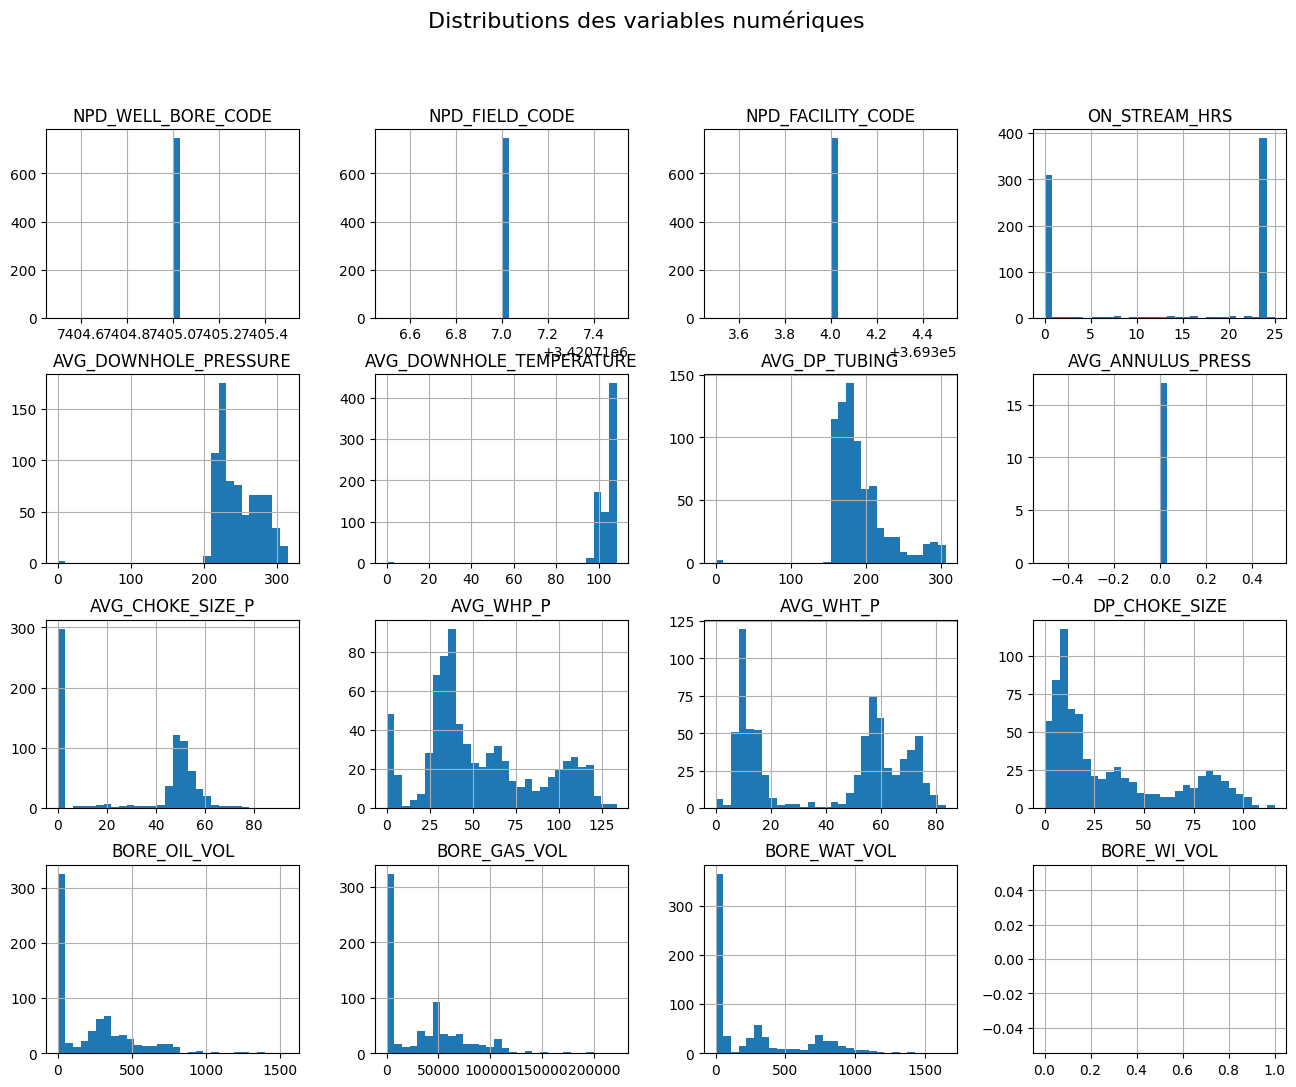

In [19]:
# global statistics
stats = data_num.describe().T
stats["missing_%"] = data_num.isnull().mean() * 100

print("Statistiques globales :")
print(stats)

# data distribution
data_num.hist(figsize=(16, 12), bins=30)
plt.suptitle("Distributions des variables numériques", fontsize=16)
plt.show()

In [20]:
#stability verification with random sampling
sample1 = data_num.sample(frac=0.3, random_state=1)
sample2 = data_num.sample(frac=0.3, random_state=2)

comparison = pd.DataFrame({
    "mean_full": data_num.mean(),
    "mean_sample1": sample1.mean(),
    "mean_sample2": sample2.mean()
})

print("mean compare (dataset vs sampling) :")
print(comparison)

mean compare (dataset vs sampling) :
                             mean_full  mean_sample1  mean_sample2
NPD_WELL_BORE_CODE        7.405000e+03  7.405000e+03  7.405000e+03
NPD_FIELD_CODE            3.420717e+06  3.420717e+06  3.420717e+06
NPD_FACILITY_CODE         3.693040e+05  3.693040e+05  3.693040e+05
ON_STREAM_HRS             1.338275e+01  1.398136e+01  1.332686e+01
AVG_DOWNHOLE_PRESSURE     2.466660e+02  2.441243e+02  2.489098e+02
AVG_DOWNHOLE_TEMPERATURE  1.049253e+02  1.049397e+02  1.051023e+02
AVG_DP_TUBING             1.925402e+02  1.931523e+02  1.920929e+02
AVG_ANNULUS_PRESS         0.000000e+00  0.000000e+00  0.000000e+00
AVG_CHOKE_SIZE_P          2.959845e+01  3.097027e+01  2.948060e+01
AVG_WHP_P                 5.390813e+01  5.074450e+01  5.630963e+01
AVG_WHT_P                 4.040905e+01  4.223625e+01  4.017780e+01
DP_CHOKE_SIZE             3.264766e+01  2.974970e+01  3.520056e+01
BORE_OIL_VOL              2.382163e+02  2.622535e+02  2.285747e+02
BORE_GAS_VOL             

In [23]:
#outliers detection and description
outliers_summary = {}

for col in data_num.columns:
    Q1 = data_num[col].quantile(0.25)
    Q3 = data_num[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = data_num[(data_num[col] < lower) | (data_num[col] > upper)]

    outliers_summary[col] = {
        "n_outliers": len(outliers),
        "percent_outliers": round(len(outliers) / len(data_num) * 100, 2)
    }

outliers_data = pd.DataFrame(outliers_summary).T
print("Summary of outliers for each variable :")
print(outliers_data)

Summary of outliers for each variable :
                          n_outliers  percent_outliers
NPD_WELL_BORE_CODE               0.0              0.00
NPD_FIELD_CODE                   0.0              0.00
NPD_FACILITY_CODE                0.0              0.00
ON_STREAM_HRS                    0.0              0.00
AVG_DOWNHOLE_PRESSURE            2.0              0.27
AVG_DOWNHOLE_TEMPERATURE         2.0              0.27
AVG_DP_TUBING                   57.0              7.64
AVG_ANNULUS_PRESS                0.0              0.00
AVG_CHOKE_SIZE_P                 0.0              0.00
AVG_WHP_P                        0.0              0.00
AVG_WHT_P                        0.0              0.00
DP_CHOKE_SIZE                    0.0              0.00
BORE_OIL_VOL                    13.0              1.74
BORE_GAS_VOL                    13.0              1.74
BORE_WAT_VOL                     7.0              0.94
BORE_WI_VOL                      0.0              0.00


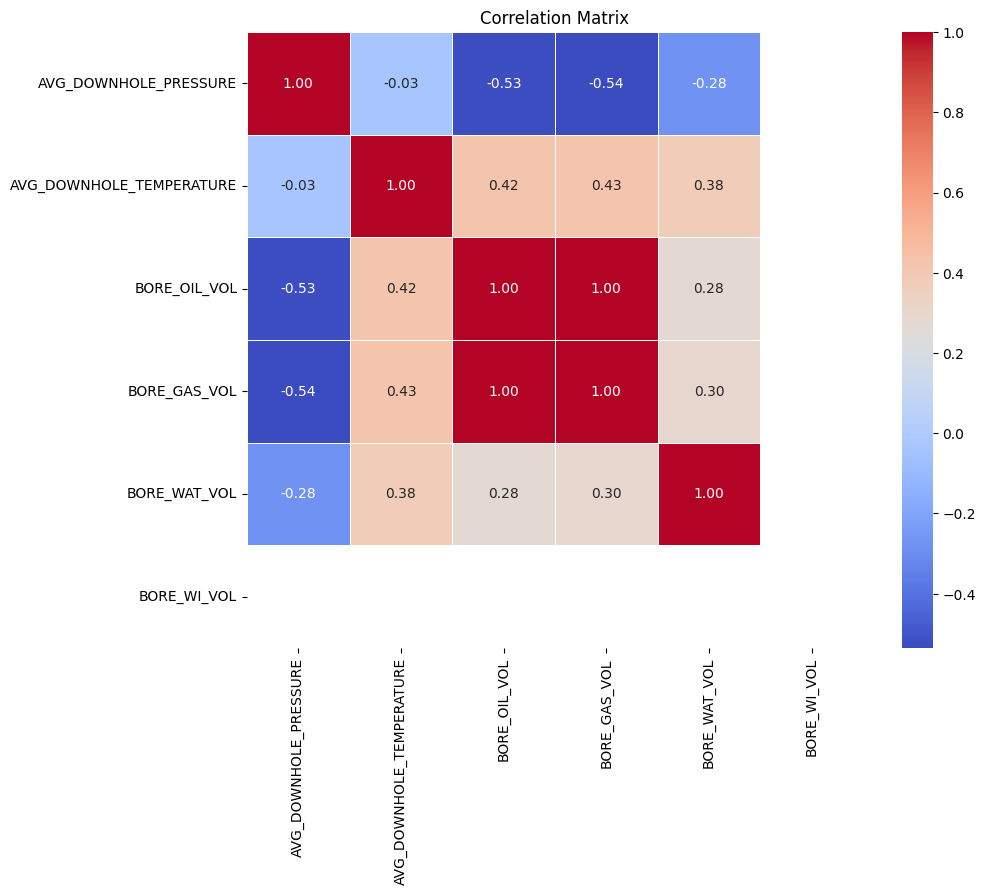

In [32]:
#correlation matrix key data
correlation_matrix_all = data[['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL', 'BORE_WI_VOL']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix_all,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5
)

plt.title("Correlation Matrix")
plt.show()

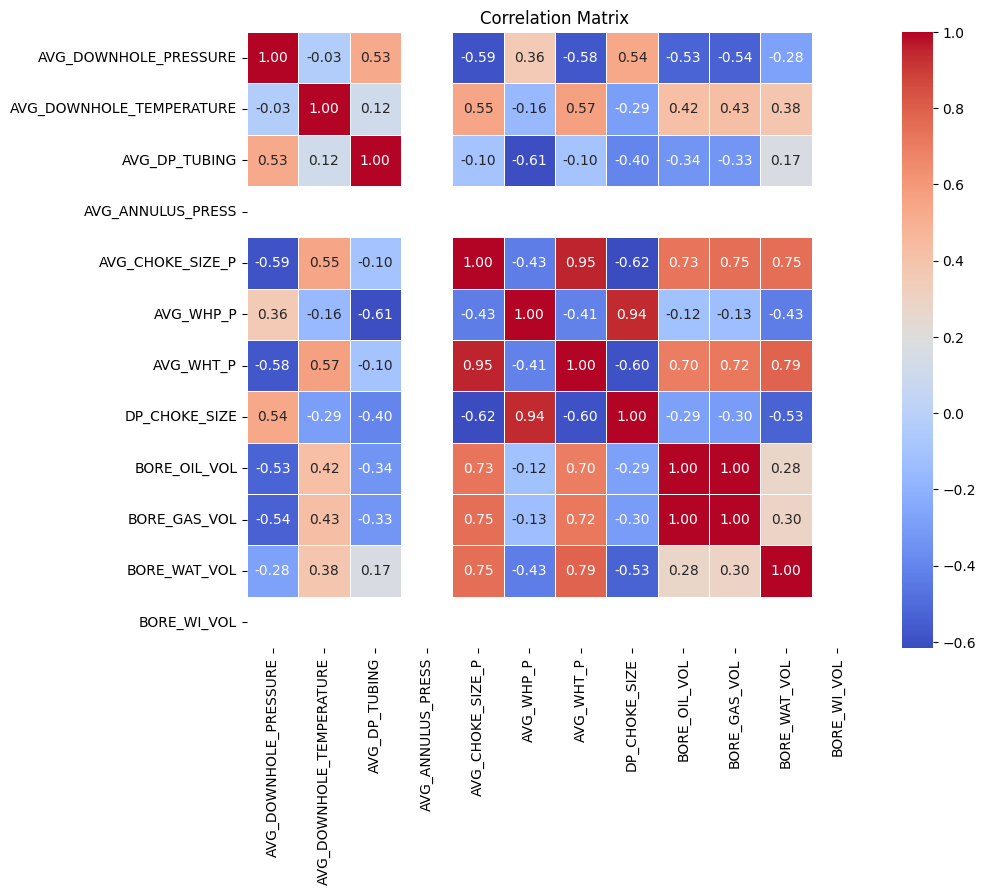

In [33]:
correlation_matrix_all = data[['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL', 'BORE_WI_VOL']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix_all,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5
)

plt.title("Correlation Matrix")
plt.show()